In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/25-03_Imputed_Data_w_features.csv')
combined_data = pd.read_csv('Data/25-03_Imputed_Data.csv')
combined_data.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Interest_Rate
0,7000.0,68000.0,18.0,0.0,-99.0,9.0,14.0,< 1 year,Rent,not verified,car,Female,1.0
1,30000.0,102880.0,15.0,0.0,17.0,12.0,24.0,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female,3.0
2,24725.0,75566.0,16.0,0.0,-99.0,12.0,16.0,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male,3.0
3,16000.0,56160.0,14.0,3.0,-99.0,16.0,22.0,< 1 year,Rent,VERIFIED - income source,debt_consolidation,Male,3.0
4,17000.0,96000.0,22.0,1.0,-99.0,19.0,30.0,8 years,Own,VERIFIED - income source,debt_consolidation,Female,1.0


In [3]:
#Importing all model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [4]:
model_data = pd.get_dummies(df)
X = model_data.drop('Interest_Rate',axis = 1)
y = model_data['Interest_Rate']

In [5]:
#Initialize all models
clf1 = LogisticRegression(random_state = 2)
clf2 = DecisionTreeClassifier(random_state = 2)
clf3 = RandomForestClassifier(random_state = 2)
clf4 = AdaBoostClassifier(random_state = 2)
clf5 = GradientBoostingClassifier(random_state = 2)
clf6 = XGBClassifier(random_state = 2)
clf7 = CatBoostClassifier(random_state = 2)

In [6]:
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4296 Variance Error:  0.009
DTC Average Score (f1):  0.4294 Variance Error:  0.006
RF Average Score (f1):  0.5018 Variance Error:  0.0056
AdaBst Average Score (f1):  0.5146 Variance Error:  0.0026
GBC Average Score (f1):  0.5173 Variance Error:  0.0023
XGB Average Score (f1):  0.5273 Variance Error:  0.003
CAT Average Score (f1):  0.5302 Variance Error:  0.0045


In [13]:
#Post feature engieneering we have achieved a 3% increase in our accuracy.

# Performing USL on the test Data to give us more Interest_Rate Datapoints

In [7]:
usl_data = combined_data[combined_data['Interest_Rate'].isna()]

In [8]:
def len_emp(x):
    return int(x.strip().strip('<').strip('year').strip('years').strip().strip('+'))
usl_data['Length_Employed'] = usl_data['Length_Employed'].apply(len_emp)

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
usl_model = pd.get_dummies(usl_data)
usl_model = usl_model.drop('Interest_Rate',axis = 1)
usl_model.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
157215,27500.0,129000.0,13.0,0.0,68.0,10.0,37.0,10,1,0,...,0,0,0,0,0,0,0,0,0,1
157216,26000.0,110000.0,11.0,0.0,-99.0,6.0,23.0,10,1,0,...,0,0,0,0,0,0,0,0,0,1
157217,6075.0,75000.0,7.0,2.0,-99.0,5.0,20.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
157218,12000.0,73000.0,8.0,0.0,-99.0,6.0,8.0,10,1,0,...,0,0,0,0,0,0,0,0,0,1
157219,35000.0,156000.0,10.0,0.0,26.0,9.0,21.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# Applying PCA and the KMeans on the above dataset

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(usl_model)
np.cumsum(pca.explained_variance_ratio_)


array([0.95983601, 0.99999623, 0.99999985, 0.99999994, 0.99999998,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca_data = pd.DataFrame(pca.fit_transform(usl_model))

# Applying KMeans

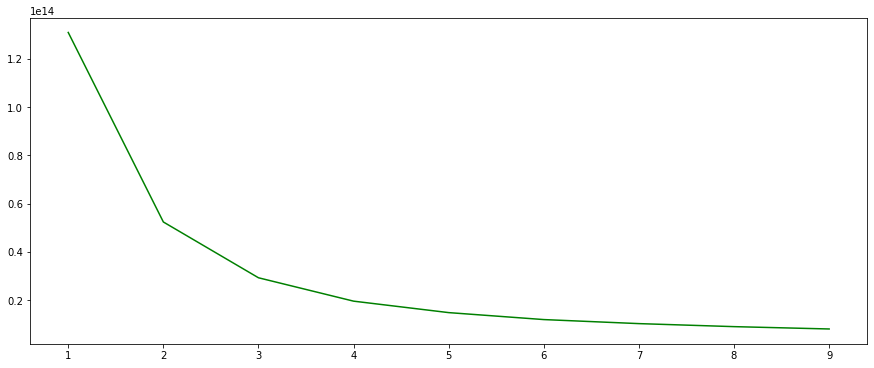

In [12]:
from sklearn.cluster import KMeans
wcv = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(pca_data)
    wcv.append(km.inertia_)
plt.figure(figsize = (15,6))
plt.plot(range(1,10),wcv,color = 'g')
plt.show()

In [13]:
#As we can see in the Elbow Plot we are getting 3 clusters as optimum

In [14]:
# from sklearn.metrics import silhouette_score
# sil = []
# for i in range(2,10):
#     km = KMeans(n_clusters = i)
#     km.fit(pca_data)
#     sil.append(silhouette_score(pca_data,km.labels_))
# plt.figure(figsize = (15,6))
# plt.plot(range(2,10),sil,color = 'b')
# plt.show()

In [15]:
km = KMeans(n_clusters = 3)
km.fit(pca_data)
pred = pd.Series(km.predict(pca_data),name= 'Interest_Rate')

In [16]:
#Checking with Annual_Income
test_w_int = pd.concat((usl_model.reset_index(drop = True),pred),axis = 1)

In [17]:
train_data = combined_data[~(combined_data['Interest_Rate'].isna())]

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


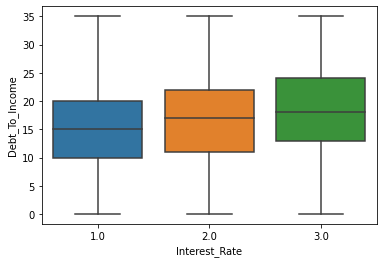

In [18]:
sns.boxplot(train_data['Interest_Rate'],train_data['Debt_To_Income'])

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


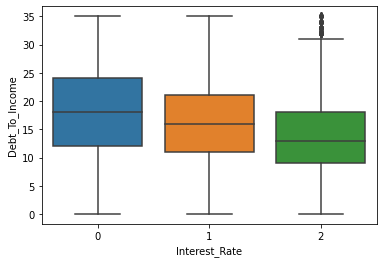

In [19]:
sns.boxplot(test_w_int['Interest_Rate'],test_w_int['Debt_To_Income'])
plt.show()

In [20]:
#0:3
#1:2
#2:1
test_w_int['Interest_Rate'] = test_w_int['Interest_Rate'].map({0:3,1:2,2:1})

In [21]:
og_data = pd.concat((combined_data[(combined_data['Interest_Rate'].isna())].drop('Interest_Rate',axis = 1).reset_index(drop = True),test_w_int['Interest_Rate']),axis = 1)

In [22]:
#Combine with 
data = pd.concat((combined_data[~(combined_data['Interest_Rate'].isna())],og_data))
data['Length_Employed'] = data['Length_Employed'].apply(len_emp) 

In [23]:
data.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Interest_Rate
0,7000.0,68000.0,18.0,0.0,-99.0,9.0,14.0,1,Rent,not verified,car,Female,1.0
1,30000.0,102880.0,15.0,0.0,17.0,12.0,24.0,4,Mortgage,VERIFIED - income,debt_consolidation,Female,3.0
2,24725.0,75566.0,16.0,0.0,-99.0,12.0,16.0,7,Mortgage,VERIFIED - income source,debt_consolidation,Male,3.0
3,16000.0,56160.0,14.0,3.0,-99.0,16.0,22.0,1,Rent,VERIFIED - income source,debt_consolidation,Male,3.0
4,17000.0,96000.0,22.0,1.0,-99.0,19.0,30.0,8,Own,VERIFIED - income source,debt_consolidation,Female,1.0


## Building Models on our combined dataset

In [40]:
model_data = pd.get_dummies(data,drop_first = True)
X = model_data.drop('Interest_Rate',axis = 1)
y = model_data['Interest_Rate']

In [25]:
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4676 Variance Error:  0.157
DTC Average Score (f1):  0.4546 Variance Error:  0.0979
RF Average Score (f1):  0.5305 Variance Error:  0.2582
AdaBst Average Score (f1):  0.5501 Variance Error:  0.2862
GBC Average Score (f1):  0.5557 Variance Error:  0.3149
XGB Average Score (f1):  0.5444 Variance Error:  0.2896
CAT Average Score (f1):  0.5464 Variance Error:  0.2914


In [41]:
#Perform sequential feature selector on a sample of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
d_for_f_s = model_data.sample(50000)
X1 = d_for_f_s.drop('Interest_Rate',axis = 1)
y1 = d_for_f_s['Interest_Rate']
X_scaled = pd.DataFrame(ss.fit_transform(X1),columns = X1.columns)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
fs = SFS(estimator = clf2,k_features = "best",scoring = 'f1_weighted',forward = True,verbose = 0)
sfsmodel = fs.fit(X_scaled,y1)
print("Features: ",sfsmodel.k_feature_names_)
print("F1_Score:",sfsmodel.k_score_)

Features:  ('Annual_Income', 'Home_Owner_Other', 'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_renewable_energy')
F1_Score: 0.5829287158967866


In [33]:
#Performing all the feature engineering on entire data
data1 = data.copy()

data1['Number_Closed_Accounts'] = data1['Total_Accounts']-data1['Number_Open_Accounts']
data1 = data1.drop('Total_Accounts',axis = 1)
data1['Monthly_Income'] = round(data1['Annual_Income']/12)
data1['Monthly_Debt'] = round(data1['Monthly_Income'] * data1['Debt_To_Income']/100)
data1 = data1.drop(['Annual_Income','Debt_To_Income'],axis = 1)


#Create a new feature called Assets,Liability,Other from Purpose_Of_Loan
def purp_bin(x):
    assets = [ 'home_improvement','renewable_energy','house','educational','small_business']
    liabilities = ['car','debt_consolidation','credit_card']
    other = ['major_purchase', 'other', 'medical', 'moving','wedding','vacation']
    if x in assets:
        return 'asset'
    elif x in liabilities:
        return 'liability'
    elif x in other:
        return 'misc.'
    
data1['Loan for Assets/Liabilities'] = data1['Purpose_Of_Loan'].apply(purp_bin)

#Loan EMI on monthly basis should not exceed 45% So using this fact we will calculate monthly EMI for the requested amount
data1['Expected_EMI'] = (0.40*(data1['Monthly_Income']-data1['Monthly_Debt']))/(data1['Number_Open_Accounts']+1)

#Now we can also calculate that for how many months will a person have to pay to cover his loan amount
import math
data1['Loan_Amt_Recovery_Months'] = (data1['Loan_Amount_Requested']/data1['Expected_EMI']).apply(np.ceil)

In [42]:
model_data = pd.get_dummies(data1,drop_first = True)
X = model_data.drop('Interest_Rate',axis = 1)
y = model_data['Interest_Rate']

In [ ]:
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4719 Variance Error:  0.127
DTC Average Score (f1):  0.4562 Variance Error:  0.0922
RF Average Score (f1):  0.5337 Variance Error:  0.2699
AdaBst Average Score (f1):  0.5509 Variance Error:  0.2864
GBC Average Score (f1):  0.5547 Variance Error:  0.3133
XGB Average Score (f1):  0.545 Variance Error:  0.2907


In [ ]:
#Perform sequential feature selector on a sample of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
d_for_f_s = model_data.sample(50000)
X1 = d_for_f_s.drop('Interest_Rate',axis = 1)
y1 = d_for_f_s['Interest_Rate']
X_scaled = pd.DataFrame(ss.fit_transform(X1),columns = X1.columns)

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs(estimator = clf2,k_features = "best",scoring = 'f1',forward = True,vrbose = 1)
sfsmodel = fs.fit(X_scaled,y1)
print("Features: ",sfsmodel.k_feature_names_)
print("F1_Score:",sfsmodel.k_score_)

In [ ]:
data['Interest_Rate'].value_counts()

In [ ]:
df['Interest_Rate'].value_counts()

###### Trying with scaling the data